In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

In [4]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9128553770086527


Question : Comment la valeur de la variable accuracy se compare avec le cas bagging qui utilise le même nombre d’arbres (200 dans notre cas) ?

In [8]:
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Arbre de décision : " + str(clf.score(X_test,y_test)))

clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Bagging (200 arbres) : " + str(clf.score(X_test,y_test)))

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Forêt aléatoire (200 arbres) : " + str(clf.score(X_test,y_test)))

Arbre de décision : 0.6520395550061805
Bagging (200 arbres) : 0.8980222496909765
Forêt aléatoire (200 arbres) : 0.9035846724351051


Question :

Construire la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test. Que pouvons-nous conclure en comparant avec la séction précedente (bagging) ?

In [21]:
import numpy as np

N = 10  # Définir le nombre d'itérations

bagging_accuracies = []  # Liste pour stocker les accuracies du BaggingClassifier
for i in range(N):  # Boucle pour N itérations
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)  # Séparer les données
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=30)  # Créer le classificateur Bagging
    clf.fit(X_train, y_train)  # Entraîner le classificateur
    bagging_accuracies.append(clf.score(X_test, y_test))  # Ajouter l'accuracy à la liste

# Afficher la moyenne et l'écart-type des accuracies du BaggingClassifier
print("BaggingClassifier : ", np.mean(bagging_accuracies), np.std(bagging_accuracies))

rf_accuracies = []  # Liste pour stocker les accuracies du RandomForestClassifier
for i in range(N):  # Boucle pour N itérations
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)  # Séparer les données
    clf = RandomForestClassifier(n_estimators=30)  # Créer le classificateur Random Forest
    clf.fit(X_train, y_train)  # Entraîner le classificateur
    rf_accuracies.append(clf.score(X_test, y_test))  # Ajouter l'accuracy à la liste

# Afficher la moyenne et l'écart-type des accuracies du RandomForestClassifier
print("RandomForestClassifier ", np.mean(rf_accuracies), np.std(rf_accuracies))

BaggingClassifier :  0.9298109010011123 0.014387167467484922
RandomForestClassifier  0.9622914349276975 0.005768138893198734


Le RandomForestClassifier est le meilleur modèle dans ce cas, avec une accuracy moyenne plus élevée et une meilleure stabilité (écart-type plus faible).


Question :

Construire le graphique accuracy vs n_estimators. Que constatez-vous ? A partir de quelle valeur on n’améliore plus ?

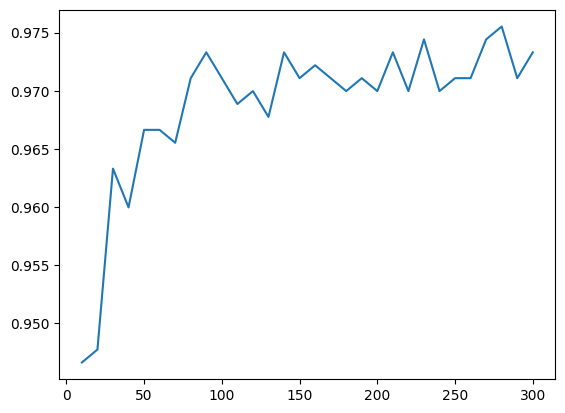

In [22]:
import matplotlib.pyplot as plt

N = 30  # Définir le nombre d'itérations
accuracy = []  # Liste pour stocker les valeurs d'accuracy

# Séparer les données en ensembles d'apprentissage et de test (50% pour chaque)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Boucle pour N itérations
for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1)*10)  # Créer le classificateur avec un nombre croissant d'arbres
    clf.fit(X_train, y_train)  # Entraîner le classificateur sur les données d'apprentissage
    accuracy.append(clf.score(X_test, y_test))  # Ajouter l'accuracy à la liste

# Tracer l'accuracy en fonction du nombre d'estimateurs
plt.plot([10*(i+1) for i in range(30)], accuracy)  # X : nombre d'estimateurs, Y : accuracy
plt.show()

Entre 50 et 100 le modèle est stable